In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [66]:
df = pd.read_csv('movies_cleaned.csv')

In [67]:
df

,release_year,rel_month,rel_day,release_weekday,industry_Hindi,industry_Tamil,industry_Telugu,industry_Kannada,industry_Malayalam,is_pan_india,...,Horror,Mystery,Romantic,Thriller,Other_Genre,weekend1_collection_cr,india_net_cr,india_gross_cr,overseas_cr,worldwide_collection_cr
0,2017,12,22,4,1,0,0,0,0,0,...,0,0,0,1,0,114.93,339.16,433.77,124.23,558.00
1,2017,12,15,4,1,0,0,0,0,0,...,0,0,0,1,0,0.38,0.72,0.87,0.01,0.88
2,2017,12,8,4,1,0,0,0,0,0,...,0,0,1,0,0,32.20,80.16,108.21,4.09,112.30
3,2017,12,1,4,1,0,0,0,0,0,...,0,0,0,0,1,6.60,10.21,13.77,2.83,16.60
4,2017,12,1,4,1,0,0,0,0,0,...,0,0,1,0,1,1.55,2.01,2.71,0.04,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,2025,1,10,4,0,0,0,1,0,0,...,0,0,0,1,0,0.11,0.33,0.36,0.00,0.36
3365,2025,1,10,4,0,0,1,0,0,1,...,0,0,0,0,0,88.50,131.20,156.03,30.25,186.28
3366,2025,1,3,4,0,0,0,1,0,0,...,0,0,0,0,0,0.14,0.26,0.29,0.00,0.29
3367,2025,1,3,4,0,0,0,1,0,0,...,0,0,0,0,0,0.02,0.02,0.02,0.00,0.02


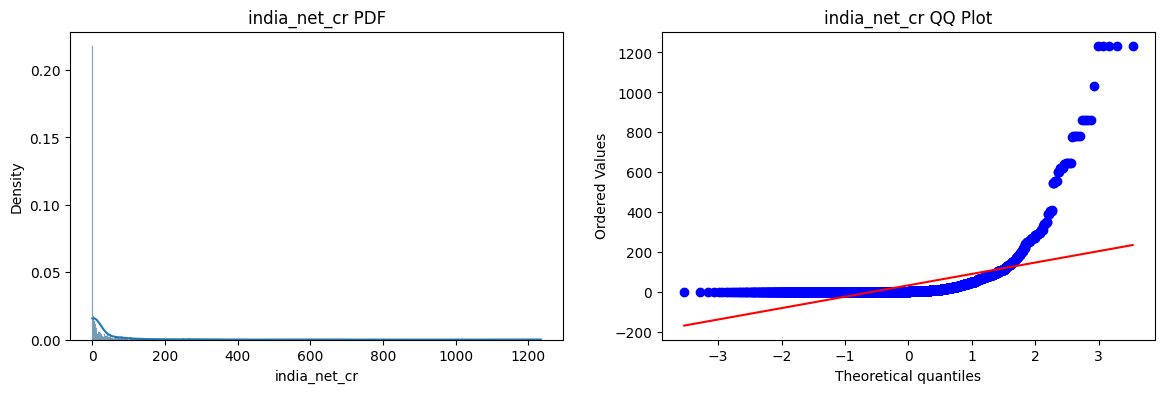

In [68]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['india_net_cr'], kde=True, stat="density") # Use histplot with kde=True and stat="density" for similar output to distplot
plt.title('india_net_cr PDF')

plt.subplot(122)
stats.probplot(df['india_net_cr'], dist="norm", plot=plt)
plt.title('india_net_cr QQ Plot')

plt.show()


In [69]:
df[df['worldwide_collection_cr'] == 0]

,release_year,rel_month,rel_day,release_weekday,industry_Hindi,industry_Tamil,industry_Telugu,industry_Kannada,industry_Malayalam,is_pan_india,...,Horror,Mystery,Romantic,Thriller,Other_Genre,weekend1_collection_cr,india_net_cr,india_gross_cr,overseas_cr,worldwide_collection_cr


Text(0, 0.5, 'Frequency')

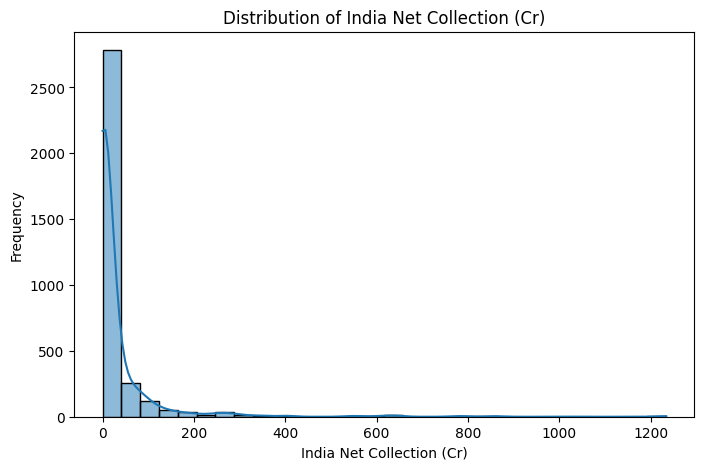

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['india_net_cr'], kde=True, ax=ax, bins=30)
ax.set_title('Distribution of India Net Collection (Cr)')
ax.set_xlabel('India Net Collection (Cr)')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

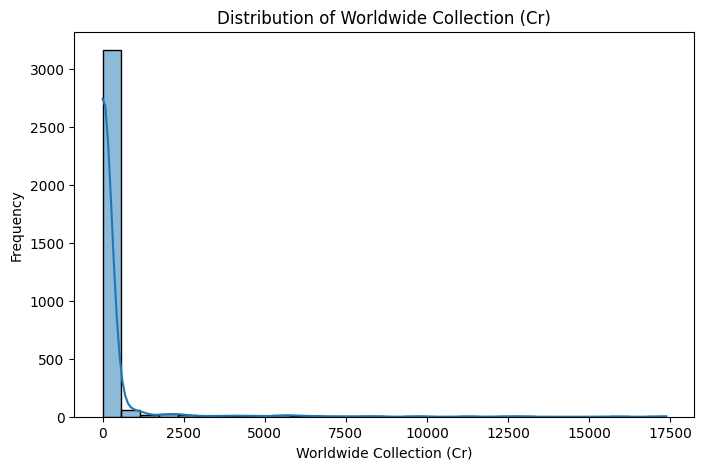

In [71]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['worldwide_collection_cr'], kde=True, ax=ax, bins=30)
ax.set_title('Distribution of Worldwide Collection (Cr)')
ax.set_xlabel('Worldwide Collection (Cr)')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

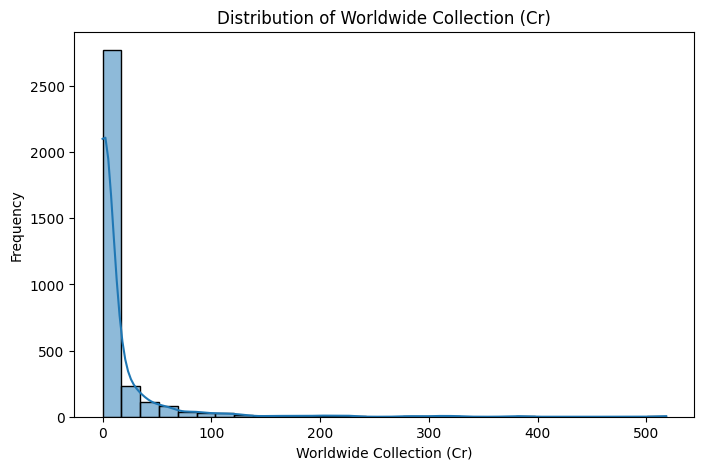

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['weekend1_collection_cr'], kde=True, ax=ax, bins=30)
ax.set_title('Distribution of Worldwide Collection (Cr)')
ax.set_xlabel('Worldwide Collection (Cr)')
ax.set_ylabel('Frequency')

In [73]:
df['was_overseas'] = (df['overseas_cr'] > 0).astype(int)
df.drop(columns=['overseas_cr'], inplace=True)


In [74]:
df.sample(10)

,release_year,rel_month,rel_day,release_weekday,industry_Hindi,industry_Tamil,industry_Telugu,industry_Kannada,industry_Malayalam,is_pan_india,...,Horror,Mystery,Romantic,Thriller,Other_Genre,weekend1_collection_cr,india_net_cr,india_gross_cr,worldwide_collection_cr,was_overseas
896,2023,2,17,4,1,0,0,0,0,0,...,0,0,0,0,0,20.20,32.02,37.80,47.80,1
2759,2025,9,26,4,0,1,0,0,0,0,...,0,0,1,0,0,0.10,0.12,0.13,0.13,0
2802,2025,8,1,4,0,1,0,0,0,0,...,0,0,0,1,0,0.04,0.05,0.05,0.05,0
1963,2024,5,31,4,0,0,0,0,1,0,...,0,0,1,1,0,0.30,0.41,0.44,0.44,0
1039,2023,3,30,3,0,1,0,0,0,0,...,0,0,0,1,0,12.60,21.60,25.50,30.00,1
885,2022,4,13,2,0,1,0,0,0,1,...,0,0,0,1,0,112.30,130.25,151.58,216.58,1
2752,2025,10,10,4,0,1,0,0,0,0,...,0,0,0,1,0,0.03,0.12,0.12,0.12,0
3203,2025,9,12,4,0,0,0,1,0,0,...,0,0,0,0,0,0.03,0.07,0.07,0.07,0
2983,2025,11,14,4,0,0,0,0,1,0,...,0,0,0,1,0,0.02,0.03,0.04,0.04,0
1609,2024,1,5,4,0,0,1,0,0,0,...,0,0,0,0,0,0.09,0.17,0.19,0.19,0


In [75]:
df.drop(columns=['india_gross_cr'], inplace=True)

In [76]:
df

,release_year,rel_month,rel_day,release_weekday,industry_Hindi,industry_Tamil,industry_Telugu,industry_Kannada,industry_Malayalam,is_pan_india,...,Family,Horror,Mystery,Romantic,Thriller,Other_Genre,weekend1_collection_cr,india_net_cr,worldwide_collection_cr,was_overseas
0,2017,12,22,4,1,0,0,0,0,0,...,0,0,0,0,1,0,114.93,339.16,558.00,1
1,2017,12,15,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0.38,0.72,0.88,1
2,2017,12,8,4,1,0,0,0,0,0,...,0,0,0,1,0,0,32.20,80.16,112.30,1
3,2017,12,1,4,1,0,0,0,0,0,...,0,0,0,0,0,1,6.60,10.21,16.60,1
4,2017,12,1,4,1,0,0,0,0,0,...,0,0,0,1,0,1,1.55,2.01,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,2025,1,10,4,0,0,0,1,0,0,...,0,0,0,0,1,0,0.11,0.33,0.36,0
3365,2025,1,10,4,0,0,1,0,0,1,...,0,0,0,0,0,0,88.50,131.20,186.28,1
3366,2025,1,3,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0.14,0.26,0.29,0
3367,2025,1,3,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0.02,0.02,0.02,0


In [77]:
#log transformation log_weekend1, log_india_net, log_worldwide
df['log_weekend1'] = np.log1p(df['weekend1_collection_cr'])
df['log_india_net'] = np.log1p(df['india_net_cr'])
df['log_worldwide'] = np.log1p(df['worldwide_collection_cr'])

In [79]:
df.to_csv('movies_cleaned_2.csv', index=False)